In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_iris
import seaborn as sns 


# Load Data Set 

In [2]:
iris = load_iris()

# transform to dataframe
iris_dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


features = iris_dataset.drop('target', axis=1)
target = iris_dataset['target']

In [3]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


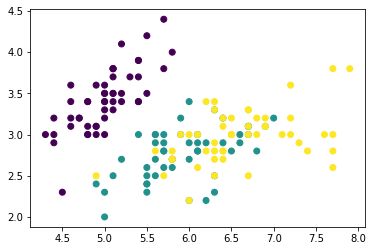

In [4]:
plt.scatter(iris_dataset['sepal length (cm)'], iris_dataset['sepal width (cm)'], c=iris_dataset['target'])

# Split Train and Test set 

Text(0.5, 1.0, 'Test set')

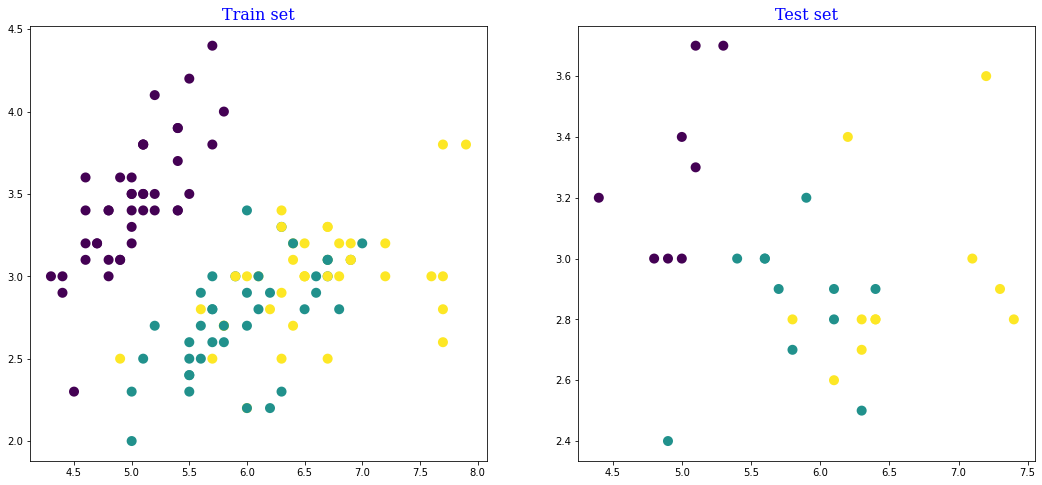

In [5]:
# split train and test set 
from sklearn.model_selection import train_test_split

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

train_features,test_features, train_labels, test_labels = train_test_split(features,target,test_size=0.2, random_state=5)

plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(train_features['sepal length (cm)'], train_features['sepal width (cm)'], c=train_labels, alpha=1, linewidth=4)

plt.title('Train set',fontdict=font)
plt.subplot(122)
plt.scatter(test_features['sepal length (cm)'], test_features['sepal width (cm)'], c=test_labels, alpha=1, linewidth=4)
plt.title('Test set', fontdict=font)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

classifier_model = KNeighborsClassifier(n_neighbors=1)
classifier_model.fit(train_features, train_labels)
print("Train set score", classifier_model.score(train_features, train_labels))
print("Test set score", classifier_model.score(test_features, test_labels))

Train set score 1.0
Test set score 0.9


# Cross Validation 

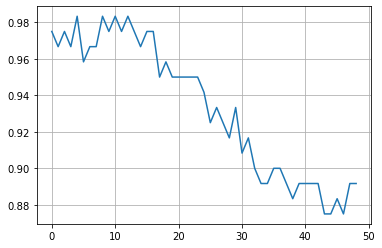

In [7]:
from sklearn.model_selection import cross_val_score

val_score = []
hyper_parameter = list(range(1,50))

for n in hyper_parameter:
    
    score = cross_val_score(KNeighborsClassifier(n), train_features, train_labels, cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)
plt.grid()


# Validation Curve

C:\Users\mwambans\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


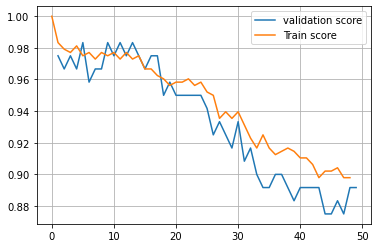

In [8]:
from sklearn.model_selection import validation_curve
k = np.arange(1,50)

classifier_model = KNeighborsClassifier()
train_score, valid_score = validation_curve(classifier_model, train_features, train_labels, 'n_neighbors', k, cv=5)

plt.plot(k, valid_score.mean(axis=1),label='validation score' )
plt.plot(train_score.mean(axis=1), label='Train score')
plt.legend()
plt.grid()

# GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV

# define a dictionary containing different hyperparameters to adjust

param_grid = {
    "n_neighbors": np.arange(1,20), 
    "metric": ["euclidean", "manhattan"]
}

grid_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_model.fit(train_features, train_labels)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [10]:
print(grid_model.best_score_)
print(grid_model.best_estimator_)
best_gridSCV_model = grid_model.best_estimator_

0.9833333333333334
KNeighborsClassifier(metric='euclidean')


In [11]:
best_gridSCV_model.score(test_features, test_labels)

0.9333333333333333

# Confusion Matrix 

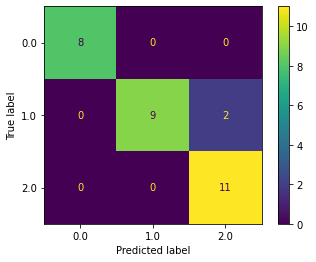

In [12]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(test_labels, best_gridSCV_model.predict(test_features))
plot_confusion_matrix(best_gridSCV_model, test_features, test_labels)

# Learning Curve
## To check if the model can lean more if more data provided

[ 9 19 28 38 48 57 67 76 86 96]


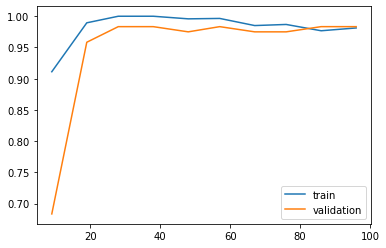

In [13]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(best_gridSCV_model, train_features, train_labels, 
                                           train_sizes=np.linspace(0.1,1.0,10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()

# Exercice¶
## search the right hyper parameter that has the best scrore

In [14]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [16]:
titanic_features = titanic.drop('survived', axis=1)
titanic_target = titanic['survived']

titanic_train_set, titanic_test_set, titanic_train_target, titanic_test_target = train_test_split(
    titanic_features, titanic_target, test_size=0.2)

In [17]:

titanic_param_grid = {
    "n_neighbors": np.arange(1,20), 
    "metric": ["euclidean", "manhattan"]
}

titanic_grid_model = GridSearchCV(KNeighborsClassifier(), titanic_param_grid, cv=5)
titanic_grid_model.fit(titanic_train_set, titanic_train_target)
titanic_model = titanic_grid_model.best_estimator_

In [18]:
print("titanic_grid_model.best_estimator_", titanic_grid_model.best_estimator_)
print("titanic_model.score(titanic_test_set, titanic_test_target)", titanic_model.score(titanic_test_set, titanic_test_target))
print("best params", titanic_grid_model.best_params_)

titanic_grid_model.best_estimator_ KNeighborsClassifier(metric='manhattan', n_neighbors=7)
titanic_model.score(titanic_test_set, titanic_test_target) 0.7412587412587412
best params {'metric': 'manhattan', 'n_neighbors': 7}


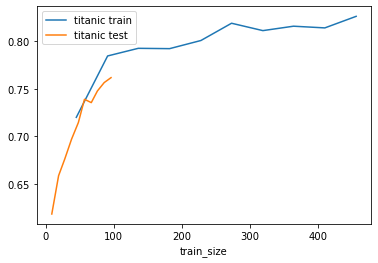

In [19]:
N_titanic, titanic_train_score, titanic_val_score = learning_curve(
    titanic_model, titanic_train_set, titanic_train_target,train_sizes=np.linspace(0.1,1.0,10), cv=5)


plt.plot(N_titanic, titanic_train_score.mean(axis=1), label='titanic train')
plt.plot(N, titanic_val_score.mean(axis=1), label='titanic test')
plt.xlabel('train_size')
plt.legend()

In [20]:
train_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [25]:
features.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64